In [356]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.impute import SimpleImputer
from scipy import stats


In [357]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [358]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [360]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [361]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [362]:
df.Name

0                           Wii Sports
1                    Super Mario Bros.
2                       Mario Kart Wii
3                    Wii Sports Resort
4             Pokemon Red/Pokemon Blue
                     ...              
16714    Samurai Warriors: Sanada Maru
16715                 LMA Manager 2007
16716          Haitaka no Psychedelica
16717                 Spirits & Spells
16718              Winning Post 8 2016
Name: Name, Length: 16719, dtype: object

In [363]:
df.Year_of_Release

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16714    2016.0
16715    2006.0
16716    2016.0
16717    2003.0
16718    2016.0
Name: Year_of_Release, Length: 16719, dtype: float64

In [364]:
df.Genre

0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
             ...     
16714          Action
16715          Sports
16716       Adventure
16717        Platform
16718      Simulation
Name: Genre, Length: 16719, dtype: object

In [365]:
df.Publisher

0            Nintendo
1            Nintendo
2            Nintendo
3            Nintendo
4            Nintendo
             ...     
16714      Tecmo Koei
16715     Codemasters
16716    Idea Factory
16717         Wanadoo
16718      Tecmo Koei
Name: Publisher, Length: 16719, dtype: object

In [366]:
df.Critic_Score

0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
16714     NaN
16715     NaN
16716     NaN
16717     NaN
16718     NaN
Name: Critic_Score, Length: 16719, dtype: float64

In [367]:
df.Critic_Count

0        51.0
1         NaN
2        73.0
3        73.0
4         NaN
         ... 
16714     NaN
16715     NaN
16716     NaN
16717     NaN
16718     NaN
Name: Critic_Count, Length: 16719, dtype: float64

In [368]:
df.User_Score

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16714    NaN
16715    NaN
16716    NaN
16717    NaN
16718    NaN
Name: User_Score, Length: 16719, dtype: object

In [369]:
df.User_Count

0        322.0
1          NaN
2        709.0
3        192.0
4          NaN
         ...  
16714      NaN
16715      NaN
16716      NaN
16717      NaN
16718      NaN
Name: User_Count, Length: 16719, dtype: float64

In [370]:
df.Developer

0        Nintendo
1             NaN
2        Nintendo
3        Nintendo
4             NaN
           ...   
16714         NaN
16715         NaN
16716         NaN
16717         NaN
16718         NaN
Name: Developer, Length: 16719, dtype: object

In [371]:
df.Rating

0          E
1        NaN
2          E
3          E
4        NaN
        ... 
16714    NaN
16715    NaN
16716    NaN
16717    NaN
16718    NaN
Name: Rating, Length: 16719, dtype: object

In [372]:
df = df.rename(columns={"Year_of_Release": "Year",
                            "NA_Sales": "NA",
                            "EU_Sales": "EU",
                            "JP_Sales": "JP",
                            "Other_Sales": "Other",
                            "Global_Sales": "Global"})
df = df[df["Year"].notnull()]
df = df[df["Genre"].notnull()]
df["Year"] = df["Year"].apply(int)
df["Age"] = 2018 - df["Year"]
df.describe(include="all")


,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age
count,16448,16448,16448.000000,16448,16416,16448.000000,16448.000000,16448.000000,16448.000000,16448.00000,7983.000000,7983.000000,9840,7463.000000,9907,9769,16448.000000
unique,11429,31,NaN,12,579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1680,8,NaN
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E,NaN
freq,12,2127,NaN,3308,1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2377,NaN,201,3922,NaN
mean,NaN,NaN,2006.488996,NaN,NaN,0.263965,0.145895,0.078472,0.047583,0.53617,68.994363,26.441313,NaN,163.015141,NaN,NaN,11.511004
std,NaN,NaN,5.877470,NaN,NaN,0.818286,0.506660,0.311064,0.187984,1.55846,13.920060,19.008136,NaN,563.863327,NaN,NaN,5.877470
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.01000,13.000000,3.000000,NaN,4.000000,NaN,NaN,-2.000000
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.06000,60.000000,12.000000,NaN,10.000000,NaN,NaN,8.000000
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.17000,71.000000,22.000000,NaN,24.000000,NaN,NaN,11.000000
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.47000,79.000000,36.000000,NaN,81.000000,NaN,NaN,15.000000


In [373]:
# Imputation for 'Year' column
median_year = df['Year'].median()
df['Year'] = df['Year'].fillna(median_year)

In [374]:
# Deletion for 'Publisher' column
df.dropna(subset=['Publisher'], inplace=True)

# Print the updated DataFrame to verify the changes
print(df.head())

                       Name Platform  Year         Genre Publisher     NA  \
0                Wii Sports      Wii  2006        Sports  Nintendo  41.36   
1         Super Mario Bros.      NES  1985      Platform  Nintendo  29.08   
2            Mario Kart Wii      Wii  2008        Racing  Nintendo  15.68   
3         Wii Sports Resort      Wii  2009        Sports  Nintendo  15.61   
4  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo  11.27   

      EU     JP  Other  Global  Critic_Score  Critic_Count User_Score  \
0  28.96   3.77   8.45   82.53          76.0          51.0          8   
1   3.58   6.81   0.77   40.24           NaN           NaN        NaN   
2  12.76   3.79   3.29   35.52          82.0          73.0        8.3   
3  10.93   3.28   2.95   32.77          80.0          73.0          8   
4   8.89  10.22   1.00   31.37           NaN           NaN        NaN   

   User_Count Developer Rating  Age  
0       322.0  Nintendo      E   12  
1         NaN       Na

In [375]:
df.replace('tbd', np.nan, inplace=True)

# Convert numeric columns to float
numeric_columns = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
df[numeric_columns] = df[numeric_columns].astype(float)

# Numeric Columns Imputation
numeric_imputer = SimpleImputer(strategy='median')  # Change strategy to 'mean' or 'most_frequent' if needed
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Categorical Columns Imputation
categorical_columns = ['Developer', 'Rating']
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Change strategy to 'constant' and add fill_value='Unknown' if needed
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

print(df)

                                Name Platform  Year         Genre  \
0                         Wii Sports      Wii  2006        Sports   
1                  Super Mario Bros.      NES  1985      Platform   
2                     Mario Kart Wii      Wii  2008        Racing   
3                  Wii Sports Resort      Wii  2009        Sports   
4           Pokemon Red/Pokemon Blue       GB  1996  Role-Playing   
...                              ...      ...   ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3  2016        Action   
16715               LMA Manager 2007     X360  2006        Sports   
16716        Haitaka no Psychedelica      PSV  2016     Adventure   
16717               Spirits & Spells      GBA  2003      Platform   
16718            Winning Post 8 2016      PSV  2016    Simulation   

          Publisher     NA     EU     JP  Other  Global  Critic_Score  \
0          Nintendo  41.36  28.96   3.77   8.45   82.53          76.0   
1          Nintendo  29.0

In [376]:
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA              0
EU              0
JP              0
Other           0
Global          0
Critic_Score    0
Critic_Count    0
User_Score      0
User_Count      0
Developer       0
Rating          0
Age             0
dtype: int64

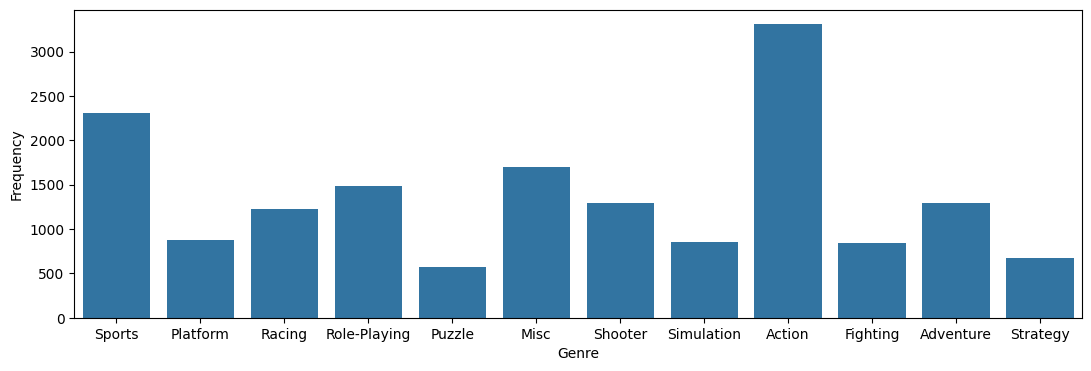

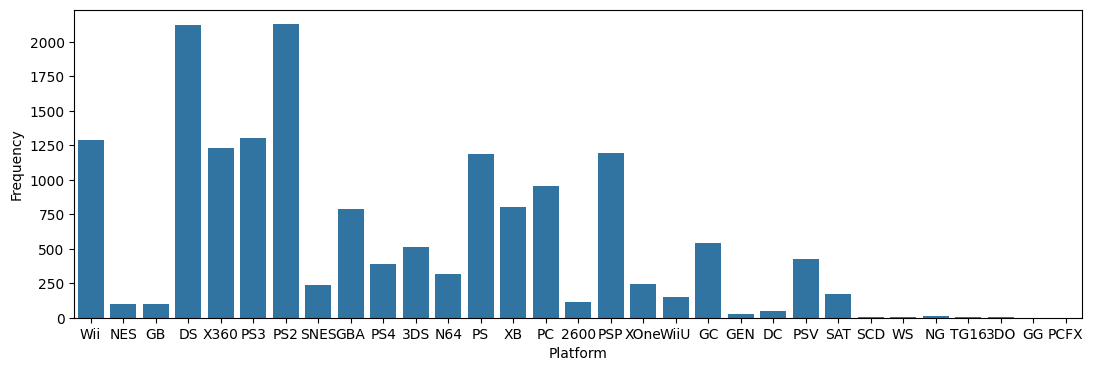

In [377]:
# List of features
features = ['Genre', 'Platform']

# Iterate over each feature
for feature in features:
    # Create a new figure with specified size
    plt.figure(figsize=(13, 4))

    # Create a countplot using the specified feature from the 'data' dataset
    sns.countplot(data=df, x=feature)

    # Set x-axis label
    plt.xlabel(feature)

    # Set y-axis label
    plt.ylabel('Frequency')

# Display the plot
plt.show()

In [378]:
df['User_Score'].unique()

array([8. , 7.5, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 2.6, 7.2, 9.2,
       7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8, 6.1,
       6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8, 5.6,
       5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5, 2.5,
       1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. , 1.6,
       9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6,
       1.4, 0.9, 1. , 9.7])

Text(0.5, 1.0, 'Platform Distribution')

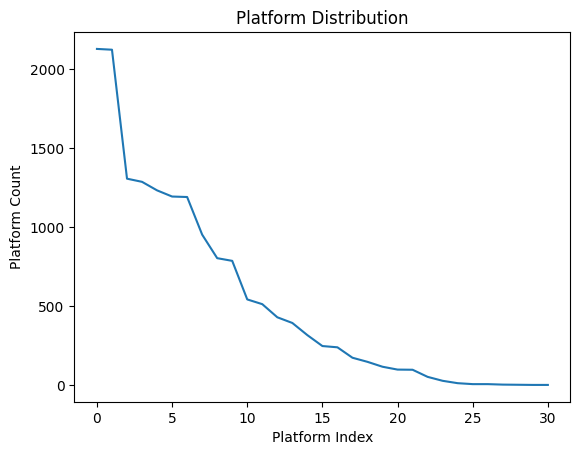

In [379]:
# Retrieve the platform counts
platform_counts = df['Platform'].value_counts()

# Generate the x-values as a range of indices
x_values = range(len(platform_counts))

# Generate the y-values as the platform counts
y_values = platform_counts.values

# Create a line plot to visualize the platform counts
plt.plot(x_values, y_values)

# Add labels and title to the plot
plt.xlabel('Platform Index')
plt.ylabel('Platform Count')
plt.title('Platform Distribution')

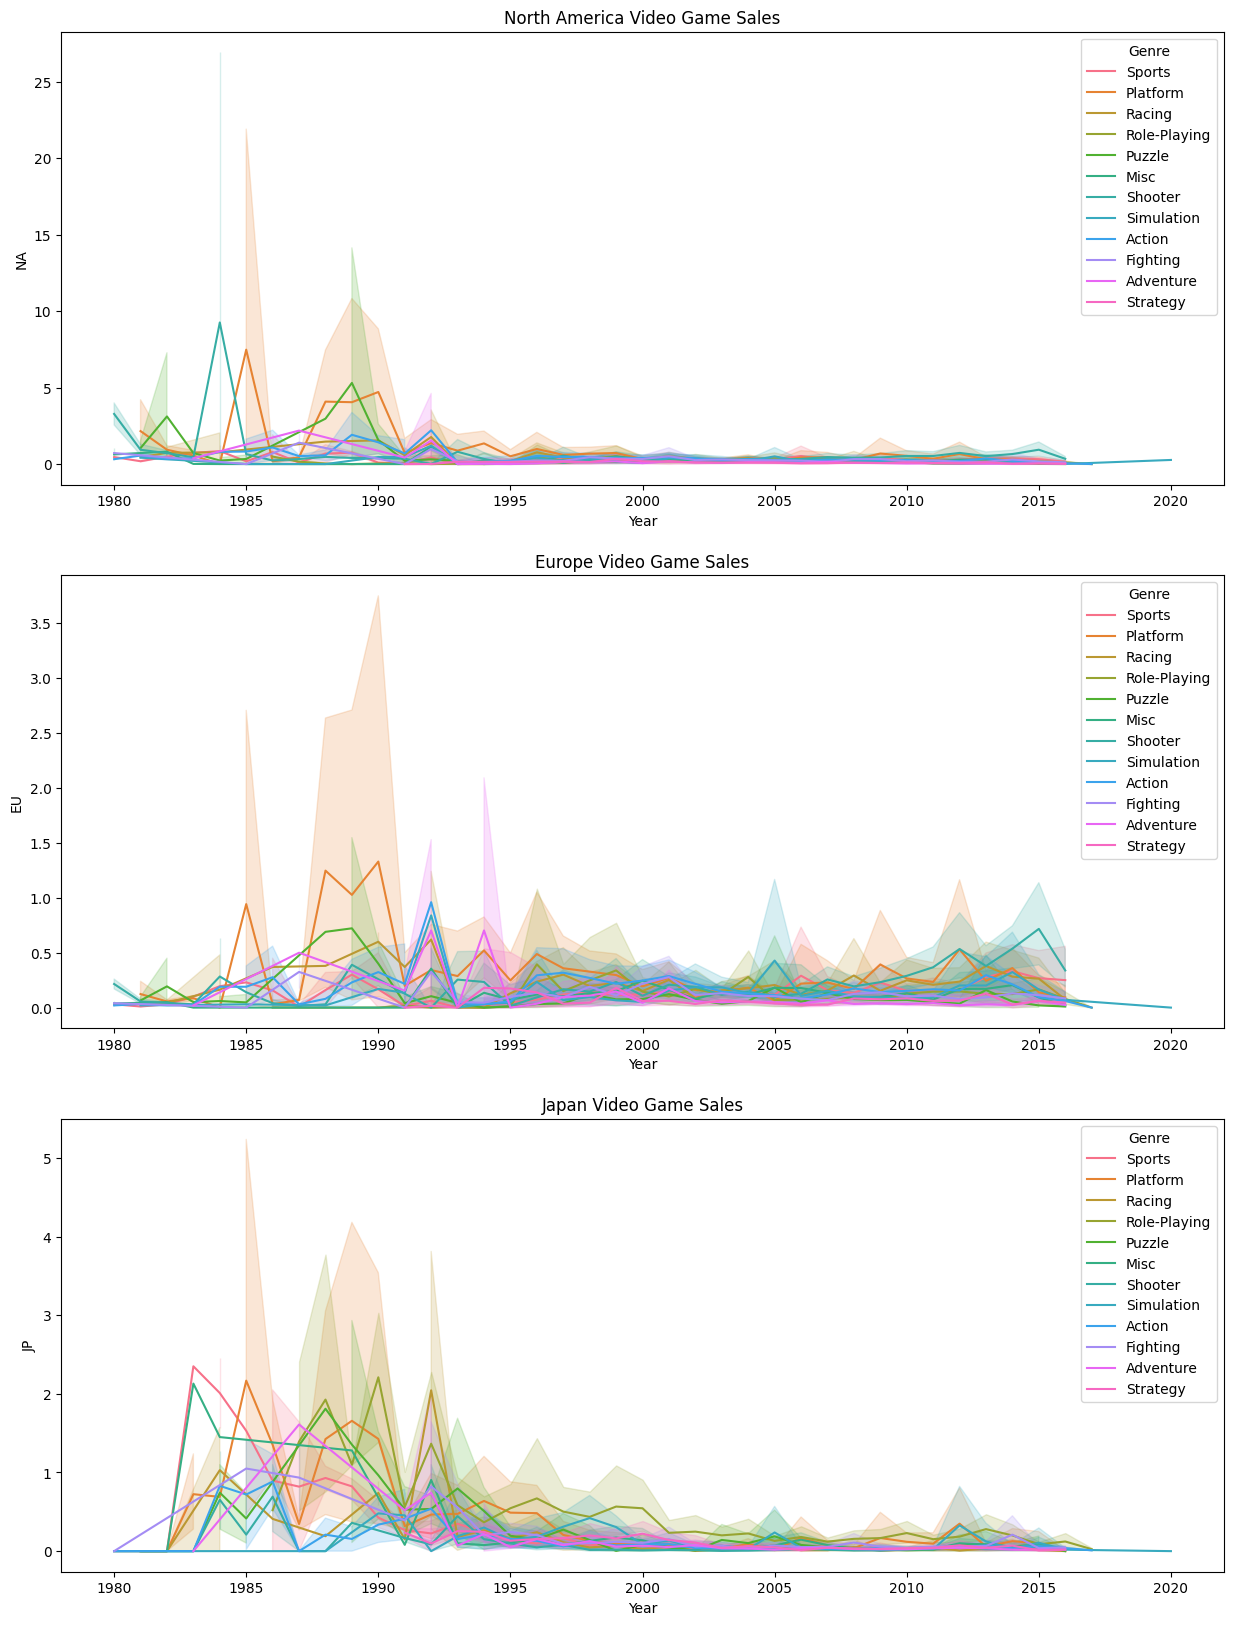

In [380]:
# Create a figure with three subplots arranged vertically, and set the figure size
fig, ax = plt.subplots(3, 1, figsize=(15, 20))

# Plot the North America video game sales over the years in the first subplot
sns.lineplot(data=df, x='Year', y="NA", hue='Genre', ax=ax[0], color="navy")
ax[0].set_title("North America Video Game Sales")

# Plot the Europe video game sales over the years in the second subplot
sns.lineplot(data=df, x='Year', y="EU", hue='Genre', ax=ax[1], color="darkorange")
ax[1].set_title("Europe Video Game Sales")

# Plot the Japan video game sales over the years in the third subplot
sns.lineplot(data=df, x='Year', y="JP", hue='Genre', ax=ax[2], color="firebrick")
ax[2].set_title("Japan Video Game Sales")

# Display the figure with all three subplots
plt.show()

In [381]:
from sklearn.preprocessing import LabelEncoder

dff = df.copy()

# Initializing LabelEncoder
le_platform = LabelEncoder()
le_genre = LabelEncoder()
le_publisher = LabelEncoder()

# Encoding categorical features
dff['Platform'] = le_platform.fit_transform(df['Platform'])
dff['Genre'] = le_genre.fit_transform(df['Genre'])
dff['Publisher'] = le_publisher.fit_transform(df['Publisher'])


In [382]:
X = dff[['Platform', 'Genre', 'NA', 'EU', 'JP', 'Other']].values

y = dff['Global'].values

In [383]:
X.shape

(16416, 6)

In [384]:
y.shape

(16416,)

In [385]:
from sklearn.model_selection import train_test_split,  cross_val_score
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
from sklearn.preprocessing import RobustScaler
ro = RobustScaler()

In [386]:
x_train = ro.fit_transform(x_train)
x_test = ro.fit_transform(x_test)
models = {'DTR': DecisionTreeRegressor(),
         'RFR':RandomForestRegressor()}

In [387]:
for model_name, model in models.items():
    cv_scores = cross_val_score(model, x_train, y_train,  cv=5)

    print(f"Model: {model_name}")
    print(f"Cross-Validation : {cv_scores}")
    print(f"Average : {np.mean(cv_scores)}\n")
    print('---------------------------------------')

Model: DTR
Cross-Validation : [0.93606476 0.92663896 0.93735752 0.94318347 0.86944235]
Average : 0.922537412315027

---------------------------------------
Model: RFR
Cross-Validation : [0.97825522 0.97334969 0.97003101 0.97428285 0.87486966]
Average : 0.9541576865110756

---------------------------------------


In [388]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)


DecisionTreeRegressor()

In [389]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [390]:
ydtrPre = dtr.predict(x_test)

In [391]:
yrfrPre = rfr.predict(x_test)

<Figure size 1600x800 with 0 Axes>

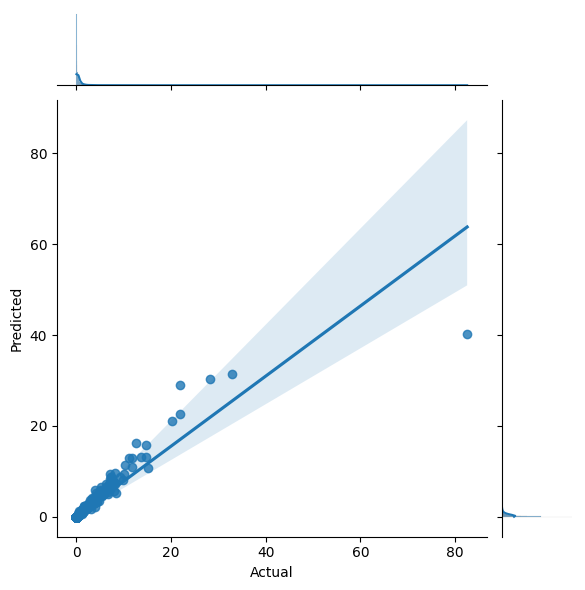

In [392]:
test = pd.DataFrame({'Predicted':ydtrPre,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [393]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluating the model
mse = mean_squared_error(y_test, ydtrPre)
r2 = r2_score(y_test, ydtrPre)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Predictions: {ydtrPre}')
print(f'Actual Values: {y_test}')

Mean Squared Error: 0.47840589102001957
R-squared: 0.8661356675960261
Predictions: [0.06   0.76   0.02   ... 0.0225 0.18   0.72  ]
Actual Values: [0.06 0.84 0.01 ... 0.02 0.2  0.72]


In [394]:
dbLinear = pd.DataFrame({'Actual': y_test, 'Predicted': ydtrPre})
dbLinear

,Actual,Predicted
0,0.06,0.0600
1,0.84,0.7600
2,0.01,0.0200
3,0.28,0.2800
4,0.36,0.3600
...,...,...
4099,0.22,0.2150
4100,0.04,0.0500
4101,0.02,0.0225
4102,0.20,0.1800


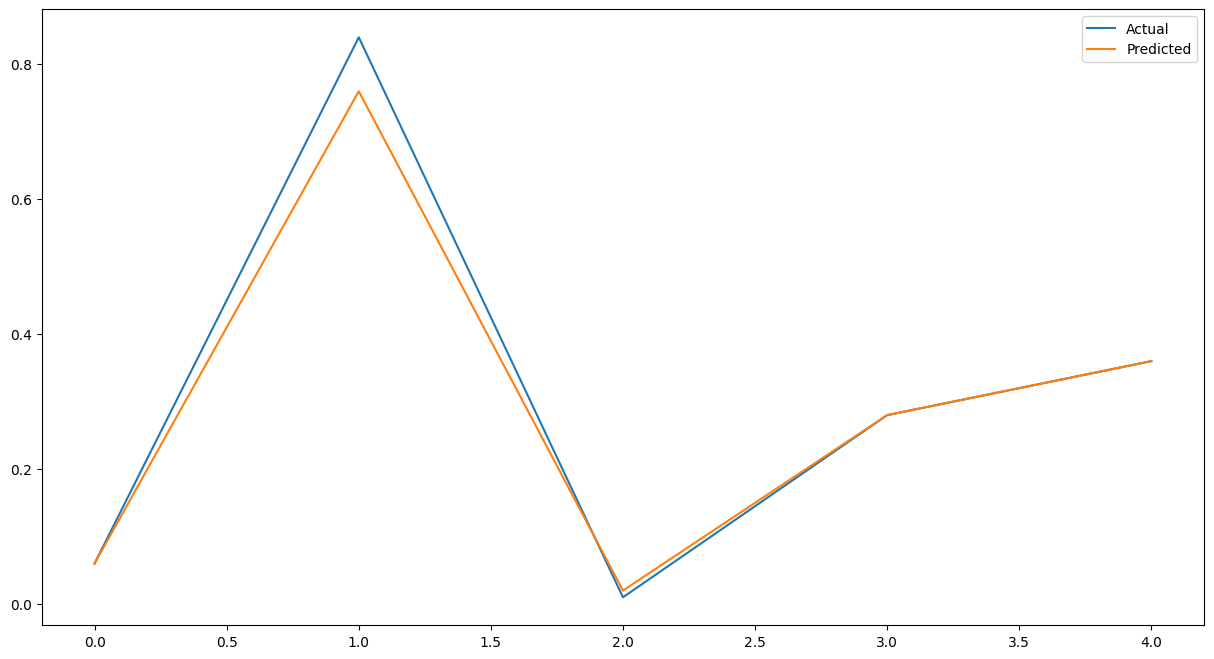

In [395]:
dbLinear1 = dbLinear.head()
dbLinear1.plot(kind='line',figsize=(15,8))
plt.show()

In [398]:
new_data = {'Platform': 'Wii', 'Genre': 'Shooter', 'Publisher': 'Nintendo', 'NA': 0.5, 'EU': 0.3, 'JP': 0.1, 'Other': 0.05}

# Encoding new data point
new_data_encoded = {
    'Platform': le_platform.transform([new_data['Platform']])[0] if new_data['Platform'] in le_platform.classes_ else -1,
    'Genre': le_genre.transform([new_data['Genre']])[0] if new_data['Genre'] in le_genre.classes_ else -1,
    'Publisher': le_publisher.transform([new_data['Publisher']])[0] if new_data['Publisher'] in le_publisher.classes_ else -1,
    'NA': new_data['NA'],
    'EU': new_data['EU'],
    'JP': new_data['JP'],
    'Other': new_data['Other']
}

# Extracting features
new_data_values = np.array([[new_data_encoded['Platform'], new_data_encoded['Genre'], new_data_encoded['NA'], new_data_encoded['EU'], new_data_encoded['JP'], new_data_encoded['Other']]])

# Making prediction
y_pred_new = dtr.predict(new_data_values)
print(f'Prediction for new data point: {y_pred_new[0]}')

Prediction for new data point: 0.25


<Figure size 1600x800 with 0 Axes>

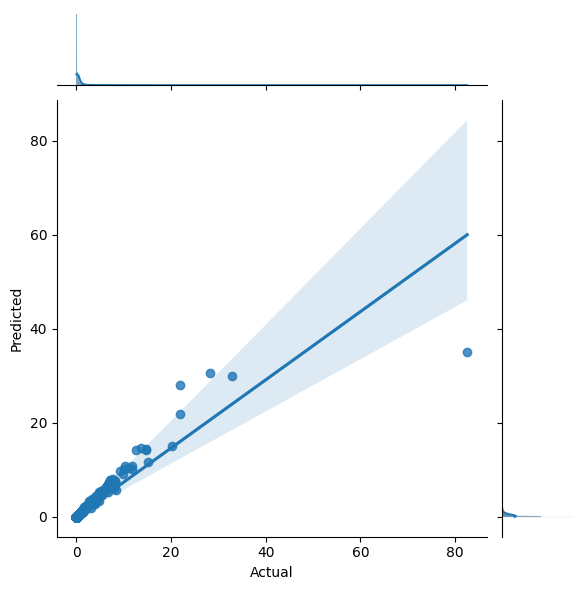

In [399]:
test = pd.DataFrame({'Predicted':yrfrPre,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [400]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluating the model
mse = mean_squared_error(y_test, yrfrPre)
r2 = r2_score(y_test, yrfrPre)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Predictions: {yrfrPre}')
print(f'Actual Values: {y_test}')

Mean Squared Error: 0.5811835861267556
R-squared: 0.8373771012829148
Predictions: [0.0601     0.8885     0.02004583 ... 0.02287896 0.2009     0.7282    ]
Actual Values: [0.06 0.84 0.01 ... 0.02 0.2  0.72]


In [401]:
dsbLinear = pd.DataFrame({'Actual': y_test, 'Predicted': yrfrPre})
dsbLinear

,Actual,Predicted
0,0.06,0.060100
1,0.84,0.888500
2,0.01,0.020046
3,0.28,0.280100
4,0.36,0.358300
...,...,...
4099,0.22,0.215638
4100,0.04,0.047581
4101,0.02,0.022879
4102,0.20,0.200900


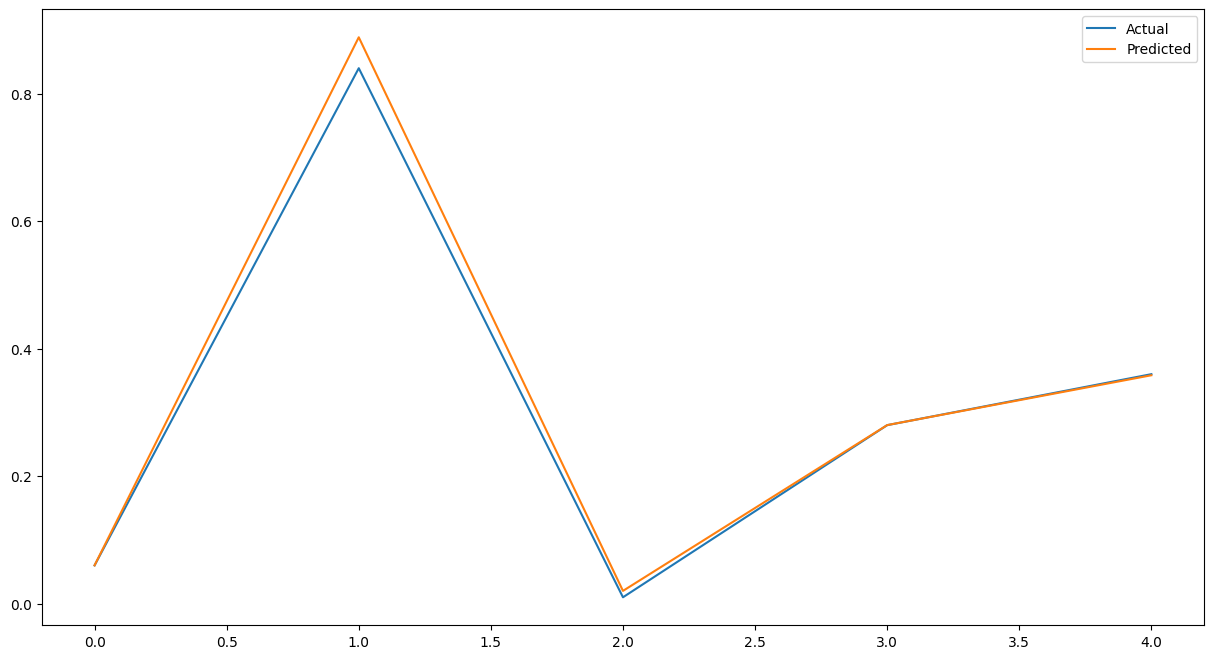

In [402]:
dsbLinear1 = dsbLinear.head()
dsbLinear1.plot(kind='line',figsize=(15,8))
plt.show()

In [403]:
new_data = {'Platform': 'Wii', 'Genre': 'Shooter', 'Publisher': 'Nintendo', 'NA': 0.5, 'EU': 0.3, 'JP': 0.1, 'Other': 0.05}

# Encoding new data point
new_data_encoded = {
    'Platform': le_platform.transform([new_data['Platform']])[0] if new_data['Platform'] in le_platform.classes_ else -1,
    'Genre': le_genre.transform([new_data['Genre']])[0] if new_data['Genre'] in le_genre.classes_ else -1,
    'Publisher': le_publisher.transform([new_data['Publisher']])[0] if new_data['Publisher'] in le_publisher.classes_ else -1,
    'NA': new_data['NA'],
    'EU': new_data['EU'],
    'JP': new_data['JP'],
    'Other': new_data['Other']
}

# Extracting features
new_data_values = np.array([[new_data_encoded['Platform'], new_data_encoded['Genre'], new_data_encoded['NA'], new_data_encoded['EU'], new_data_encoded['JP'], new_data_encoded['Other']]])

# Making prediction
y_pred_new = rfr.predict(new_data_values)
print(f'Prediction for new data point: {y_pred_new[0]}')

Prediction for new data point: 0.2542500000000002
